In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.models import Sequential



In [2]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False, #this is for not including the dense layers
    input_shape=(150,150,3)
)

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model=Sequential()

In [5]:
model.add(conv_base);

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'));
model.add(Dense(1,activation='sigmoid'));

In [6]:
conv_base.trainable=True;
set_train=False;
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_train=True;
    if set_train:
        layer.trainable=True;
    else:
        layer.trainable=False;
for layer in conv_base.layers:
    print(layer.name,layer.trainable);

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,271,873
Trainable params: 7,620,225
Non-trainable params: 7,651,648
_____________________________________

In [8]:
batch_size = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_datagen.flow_from_directory(
        'Downloads/malevfemale/Training',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 47009 images belonging to 2 classes.


In [11]:
val_ds = test_datagen.flow_from_directory(
        'Downloads/malevfemale/Validation',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary') 

Found 11649 images belonging to 2 classes.


In [14]:
from keras.optimizers import RMSprop

In [15]:
model.compile(optimizer=RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['accuracy']);

In [17]:
history=model.fit_generator(train_ds,epochs=5,validation_data=val_ds);

Epoch 1/5


C:\Users\ritam\AppData\Local\Temp\ipykernel_3468\2893248429.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_ds,epochs=5,validation_data=val_ds);


1470/1470 [==============================] - 293s 199ms/step - loss: 0.1232 - accuracy: 0.9554 - val_loss: 0.0975 - val_accuracy: 0.9653
Epoch 2/5
1470/1470 [==============================] - 517s 352ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.0997 - val_accuracy: 0.9645
Epoch 3/5
1470/1470 [==============================] - 462s 314ms/step - loss: 0.1085 - accuracy: 0.9621 - val_loss: 0.0993 - val_accuracy: 0.9655
Epoch 4/5
1470/1470 [==============================] - 324s 220ms/step - loss: 0.1016 - accuracy: 0.9645 - val_loss: 0.1096 - val_accuracy: 0.9633
Epoch 5/5
1470/1470 [==============================] - 294s 200ms/step - loss: 0.0958 - accuracy: 0.9656 - val_loss: 0.0949 - val_accuracy: 0.9672


In [18]:
import matplotlib.pyplot as plt

In [26]:
model.save("modelmalevfemale.keras")

Message SID: SMea8c6c7feae1de006e232a81c25c20a6


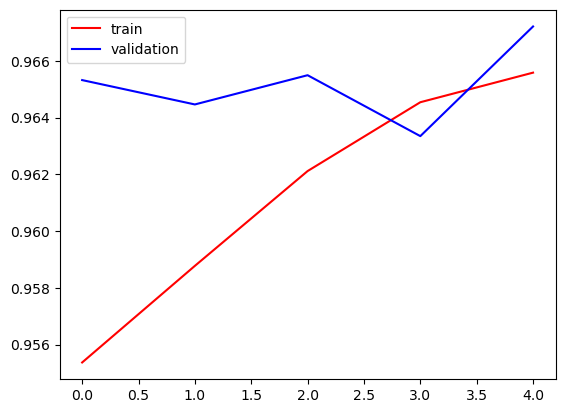

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [59]:
paths=["Downloads/premium_photo-1688740375397-34605b6abe48-removebg-preview.png",
      "Downloads/myimage-removebg-preview.png",
      "Downloads/young-determined-armenian-curlyhaired-female-university-student-listen-carefully-asignment-look-confident-ready-task-cross-hands-chest-smiling-selfassured-standing-white-background.jpg"]

In [60]:
from tensorflow import keras

1/1 [==============================] - 0s 26ms/step


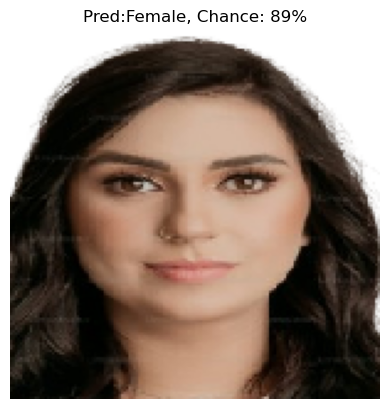

1/1 [==============================] - 0s 25ms/step


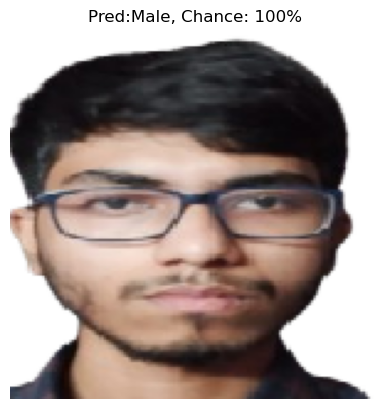

1/1 [==============================] - 0s 28ms/step


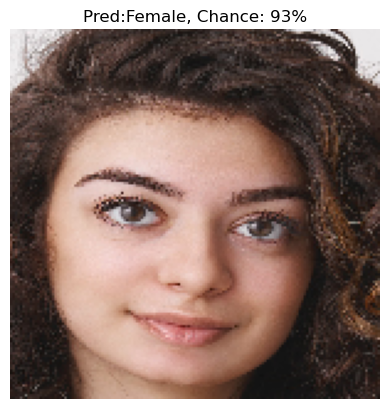

In [61]:
for path in paths:
    img = keras.utils.load_img(path, target_size=(150,150))
    img = keras.utils.img_to_array(img)
    img=img/255.0;
    test_input=img.reshape((1,150,150,3));
    pred=model.predict(test_input);
    plt.imshow(img)
    conf=pred;
    if conf>0.5:
        prediction="Male";
    else:
        prediction="Female";
        conf=1-conf;
    conf=int(conf*100);
    plt.title(f"Pred:{prediction}, Chance: {conf}%")
    plt.axis("off")
    plt.show()